In [1]:
#绘图字体和配色
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 16

class AcademicColors:
    """
    学术严谨风格配色方案
    基于Nature、Science等顶级科学期刊的设计理念
    """

    def __init__(self):
        # 主色板
        self.primary = '#333333'
        self.secondary = '#000000'
        self.background = '#F0F0F0'
        self.gridline = '#D9D9D9'

        # 分类色板（图表专用）
        self.categorical = [
            '#FF8C00',  # 明亮橙色 (保留)
            '#6A7FDB',  # 明亮靛蓝 (保留)
            '#2E8B7A',  # 深青 (保留)
            '#A0522D',  # 深红棕色 (替换金色)
            '#DA70D6',  # 明亮兰花紫 (保留)
            '#87CEEB',  # 天蓝色 (保留)
        ]

        # 发散色板
        self.diverging = [
            '#053061',  # 深蓝
            '#67A9CF',  # 浅蓝
            '#F7F7F7',  # 中性灰
            '#EF8A62',  # 浅红
            '#B2182B'   # 深红
        ]

        # 创建颜色映射
        self.categorical_cmap = ListedColormap(self.categorical)
        self.diverging_cmap = ListedColormap(self.diverging)

    def set_style(self):
        """设置matplotlib和seaborn的学术风格"""
        # 设置seaborn样式
        sns.set_style("whitegrid", {
            "axes.linewidth": 0.8,
            "grid.linewidth": 0.5,
            "grid.color": self.gridline,
            "axes.edgecolor": self.secondary,
            "axes.spines.left": True,
            "axes.spines.bottom": True,
            "axes.spines.top": False,
            "axes.spines.right": False,
        })

        # 设置matplotlib参数
        plt.rcParams.update({
            'font.size': 10,
            'axes.titlesize': 12,
            'axes.labelsize': 10,
            'xtick.labelsize': 9,
            'ytick.labelsize': 9,
            'legend.fontsize': 9,
            'figure.titlesize': 14,
            'axes.titlecolor': self.secondary,
            'axes.labelcolor': self.primary,
            'text.color': self.primary,
            'axes.edgecolor': self.secondary,
            'xtick.color': self.primary,
            'ytick.color': self.primary,
            'grid.alpha': 0.6,
            'axes.axisbelow': True
        })

        # 设置默认调色板
        sns.set_palette(self.categorical)

    def get_colors(self, n=None, palette_type='categorical'):
        """
        获取指定数量的颜色

        Parameters:
        -----------
        n : int, optional
            需要的颜色数量，如果为None则返回完整调色板
        palette_type : str
            调色板类型，'categorical' 或 'diverging'

        Returns:
        --------
        list : 颜色列表
        """
        if palette_type == 'categorical':
            colors = self.categorical
        elif palette_type == 'diverging':
            colors = self.diverging
        else:
            raise ValueError("palette_type must be 'categorical' or 'diverging'")

        if n is None:
            return colors
        elif n <= len(colors):
            return colors[:n]
        else:
            # 如果需要的颜色数量超过调色板，则循环使用
            return (colors * ((n // len(colors)) + 1))[:n]

    def _draw_palette_on_ax(self, colors, ax, title):
        """
        在指定的轴上绘制调色板
        这是palplot的替代方案，因为palplot不支持ax参数
        """
        n_colors = len(colors)
        ax.imshow(np.arange(n_colors).reshape(1, n_colors),
                  cmap=ListedColormap(colors),
                  interpolation="nearest",
                  aspect="auto")

        # 设置刻度和标签
        ax.set_xticks(np.arange(n_colors))
        ax.set_xticklabels([f'{i+1}' for i in range(n_colors)])
        ax.set_yticks([])
        ax.set_title(title, fontsize=12, color=self.secondary, pad=15)

        # 添加颜色值标签
        for i, color in enumerate(colors):
            ax.text(i, 0, color.upper(),
                   ha='center', va='center',
                   fontsize=8, color='white' if self._is_dark_color(color) else 'black',
                   weight='bold')

    def _is_dark_color(self, hex_color):
        """判断颜色是否为深色"""
        # 移除#号并转换为RGB
        hex_color = hex_color.lstrip('#')
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        # 计算亮度
        brightness = (rgb[0] * 299 + rgb[1] * 587 + rgb[2] * 114) / 1000
        return brightness < 128

    def show_palette(self, palette_type='all'):
        """
        展示调色板

        Parameters:
        -----------
        palette_type : str
            'categorical', 'diverging', 或 'all'
        """
        if palette_type == 'all':
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
            self._draw_palette_on_ax(self.categorical, ax1, '分类色板（Categorical Palette）')
            self._draw_palette_on_ax(self.diverging, ax2, '发散色板（Diverging Palette）')
        elif palette_type == 'categorical':
            fig, ax = plt.subplots(1, 1, figsize=(10, 3))
            self._draw_palette_on_ax(self.categorical, ax, '分类色板（Categorical Palette）')
        elif palette_type == 'diverging':
            fig, ax = plt.subplots(1, 1, figsize=(10, 3))
            self._draw_palette_on_ax(self.diverging, ax, '发散色板（Diverging Palette）')
        else:
            raise ValueError("palette_type must be 'categorical', 'diverging', or 'all'")

        plt.tight_layout()
        plt.show()

    def show_simple_palette(self, palette_type='all'):
        """
        使用seaborn的palplot展示调色板（简单版本，不支持自定义轴）
        """
        if palette_type in ['categorical', 'all']:
            print("分类色板（Categorical Palette）:")
            sns.palplot(self.categorical)
            plt.show()

        if palette_type in ['diverging', 'all']:
            print("发散色板（Diverging Palette）:")
            sns.palplot(self.diverging)
            plt.show()

    def demo_plots(self):
        """展示使用示例"""
        # 创建示例数据
        np.random.seed(42)
        categories = ['组别A', '组别B', '组别C', '组别D', '组别E']
        values = np.random.randint(10, 100, len(categories))

        # 创建子图
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle('学术严谨风格图表示例', fontsize=16, color=self.secondary, y=0.95)

        # 柱状图
        bars = ax1.bar(categories, values, color=self.get_colors(len(categories)))
        ax1.set_title('实验组数据对比', fontweight='bold')
        ax1.set_ylabel('测量值')
        ax1.grid(True, alpha=0.3)

        # 散点图
        x = np.random.normal(0, 1, 100)
        y = np.random.normal(0, 1, 100)
        groups = np.random.choice(categories[:3], 100)

        for i, group in enumerate(categories[:3]):
            mask = groups == group
            ax2.scatter(x[mask], y[mask],
                       color=self.categorical[i],
                       label=group, alpha=0.7, s=50)

        ax2.set_title('多组数据分布', fontweight='bold')
        ax2.set_xlabel('变量 X')
        ax2.set_ylabel('变量 Y')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 热力图数据
        data = np.random.randn(5, 5)
        im = ax3.imshow(data, cmap=self.diverging_cmap, aspect='auto')
        ax3.set_title('相关性矩阵热力图', fontweight='bold')
        ax3.set_xticks(range(5))
        ax3.set_yticks(range(5))
        ax3.set_xticklabels([f'特征{i+1}' for i in range(5)])
        ax3.set_yticklabels([f'特征{i+1}' for i in range(5)])

        # 添加颜色条
        cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
        cbar.set_label('相关系数')

        # 线图
        x_line = np.linspace(0, 10, 50)
        for i in range(3):
            y_line = np.sin(x_line + i) + np.random.normal(0, 0.1, 50)
            ax4.plot(x_line, y_line,
                    color=self.categorical[i],
                    label=f'条件{i+1}',
                    linewidth=2)

        ax4.set_title('时间序列对比', fontweight='bold')
        ax4.set_xlabel('时间')
        ax4.set_ylabel('响应值')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# 创建全局颜色实例
academic_colors = AcademicColors()

# 便捷函数
def set_academic_style():
    """快速设置学术风格"""
    academic_colors.set_style()

def get_academic_colors(n=None, palette_type='categorical'):
    """快速获取学术配色"""
    return academic_colors.get_colors(n, palette_type)

def show_academic_palette(palette_type='all'):
    """快速展示调色板（修复版本）"""
    academic_colors.show_palette(palette_type)

def show_simple_palette(palette_type='all'):
    """使用seaborn原生palplot展示调色板"""
    academic_colors.show_simple_palette(palette_type)

# 使用示例
if __name__ == "__main__":
    print("学术严谨风格配色方案已加载！")
    print("\n使用方法：")
    print("1. set_academic_style() - 设置学术风格")
    print("2. get_academic_colors(n, 'categorical') - 获取分类颜色")
    print("3. get_academic_colors(n, 'diverging') - 获取发散颜色")
    print("4. show_academic_palette() - 展示所有调色板（修复版本）")
    print("5. show_simple_palette() - 展示调色板（简单版本）")
    print("6. academic_colors.demo_plots() - 查看使用示例")


学术严谨风格配色方案已加载！

使用方法：
1. set_academic_style() - 设置学术风格
2. get_academic_colors(n, 'categorical') - 获取分类颜色
3. get_academic_colors(n, 'diverging') - 获取发散颜色
4. show_academic_palette() - 展示所有调色板（修复版本）
5. show_simple_palette() - 展示调色板（简单版本）
6. academic_colors.demo_plots() - 查看使用示例


# 第二章 PB-ROE策略的优化与改进

## 策略改进一：引入行业中性化

在第一章中，我们构建了一个基础的 PB-ROE 策略。该策略的核心思想是在**全市场范围内**，寻找那些具备**高盈利能力（高 ROE）**但估值相对较低（低 P/B）的公司。然而，这种“一刀切”的筛选方法存在一个潜在的风险：它可能导致投资组合在行业配置上出现显著偏离，无意中对某些特定行业进行了大规模的押注。

例如，在某一时期，**银行或能源等周期性行业**可能普遍呈现出低 P/B 和相对稳健的 ROE，导致策略筛选出的股票**高度集中于这些行业**。反之，一些成长性较高的行业，如**科技或医疗**，由于其固有的高估值水平，可能在全市场排序中处于不利地位，从而被系统性排除在投资组合之外。

这种对行业的无意识“豪赌”，使得策略整体表现与特定行业的景气周期高度绑定。当行业风向逆转时，组合可能面临巨大的回撤风险。

> 我们追求的超额收益，应当主要源于在同类企业中“择优”的能力（Alpha from stock selection），而非依赖于对行业未来走势的投机性判断（Alpha from industry timing）。

为了解决这一问题，我们提出第一个关键改进：**引入行业中性化约束（Industry Neutralization）**。

---

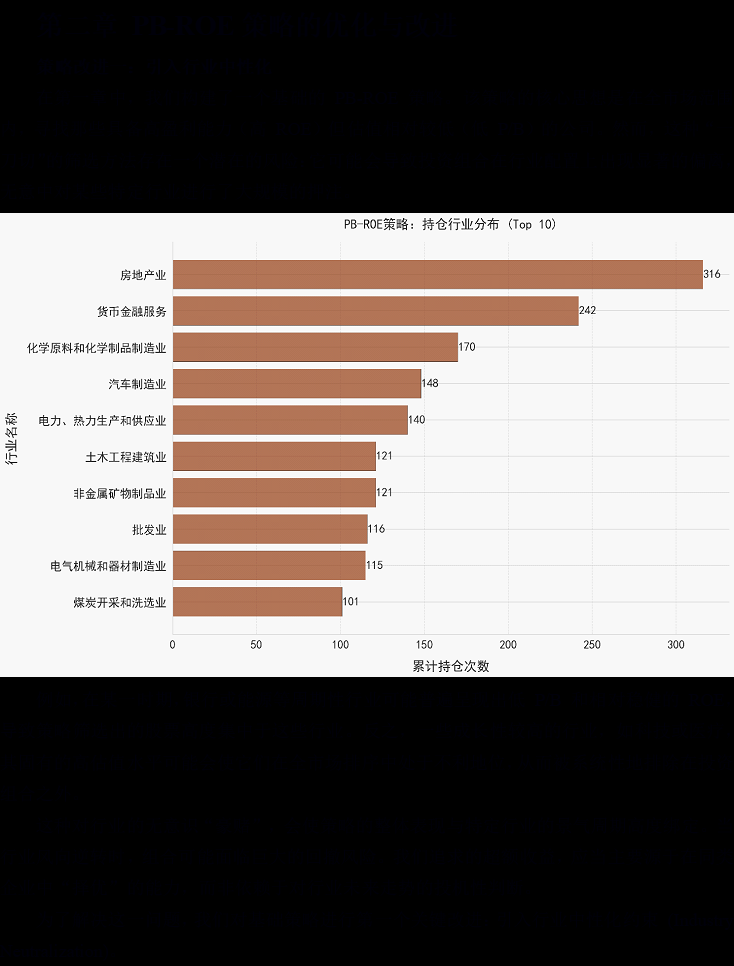
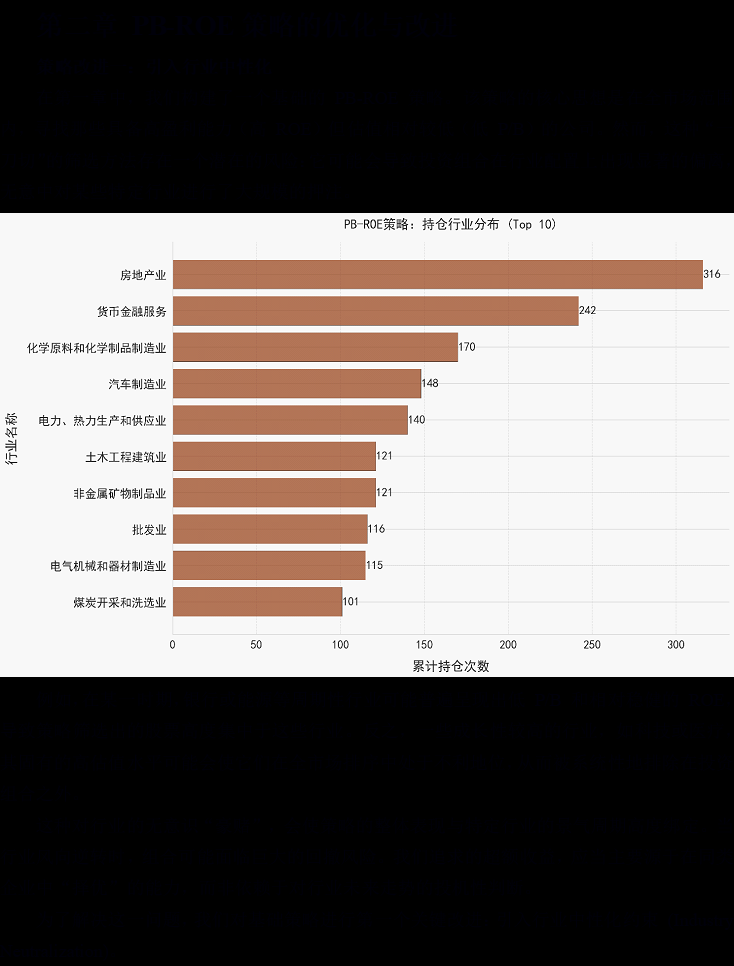
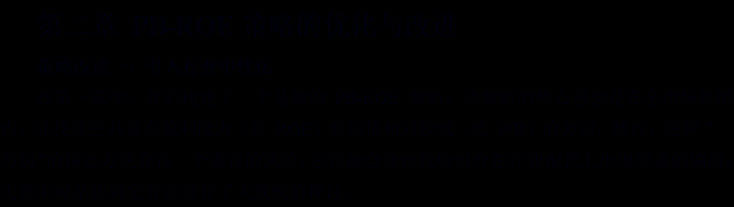

## 核心的改进逻辑

### 1. 分组处理

我们不再将所有 A 股市场的公司放在同一个池子里进行统一比较和排序。取而代之的是，将股票按其所属行业（例如，依据证监会一级行业分类）进行分组，从而尊重不同行业的财务结构差异。

### 2. 行业内排序

在每个报告期，我们在每一个独立的行业内部，根据 PB-ROE 的标准进行排序与筛选。具体做法包括：

- 在每个行业中，找到 **ROE 排名靠前** 且 **P/B 排名也靠前** 的公司；
- 通过对这两个排名进行加权或综合排名，从而识别出“高质量且低估值”的标的。

### 3. 构建组合

通过在每个行业内筛选出综合排名最靠前的股票（例如前 20%），我们构建出一个具有更好行业均衡性的投资组合：

- 组合的行业权重更加接近市场整体；
- 避免了对单一行业的过度暴露。

### 4. 策略目标优化

通过行业中性化的实施，我们的策略目标变得更加纯粹：

- 在**控制行业风险敞口**的前提下，专注于发掘**每个行业内部最具性价比的个股**；
- 有助于降低组合波动性，提升风险调整后收益（例如提升夏普比率）；
- 改善组合的长期稳定性与可预测性。

> 我们将通过代码实现这一改进方法，并构建出新的策略组合——“PB-ROE行业中性策略”。



In [8]:
#从数据库导入数据dfpbroech2
# import os
# os.environ["MODIN_ENGINE"] = "ray"
# os.environ["MODIN_CPUS"] = "16"
# import modin.pandas as pd
import pandas as pd
from sqlalchemy import create_engine

# 根据你的实际数据库信息填写
username = "panjinhe"
password = "20020112p"
host = "localhost"
port = "5432"
database = "pbroe"

# 构建连接字符串
connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"

# 创建引擎
engine = create_engine(connection_string)

# 读取pbroe.pbroech11表
dfpbroech2 = pd.read_sql_table('pbroech11', engine, schema='pbroe')

print(dfpbroech2.info())

dfpbroech2.rename(columns={
    'f050504c': 'ROEttm',
    'f100401a': 'PB',
    'f100603c': 'PEttm',
    'msmvosd': '流通市值',
    'msmvttl': '总市值',
    'markettype': '市场类型'
}, inplace=True)

print(dfpbroech2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260099 entries, 0 to 260098
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   stkcd       260099 non-null  object        
 1   shortname   260099 non-null  object        
 2   ifst        260099 non-null  int64         
 3   accper      260099 non-null  datetime64[ns]
 4   indcd1      260099 non-null  object        
 5   indnme1     260099 non-null  object        
 6   f050504c    246158 non-null  float64       
 7   f100401a    257426 non-null  float64       
 8   f100603c    208713 non-null  float64       
 9   markettype  259767 non-null  object        
 10  msmvosd     259789 non-null  float64       
 11  msmvttl     259789 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 23.8+ MB
None
    stkcd shortname  ifst     accper indcd1 indnme1    ROEttm         PB  \
0  000001      深发展A     0 1991-12-31    

In [9]:
#行业中性化
print(f"\n开始进行行业中性化PB-ROE策略筛选...")

# 1. 数据预处理
# 复制数据，避免在原始DataFrame上直接修改
data = dfpbroech2.copy()

# 删除 PB 或 ROEttm 的缺失值
data.dropna(subset=['PB', 'ROEttm'], inplace=True)

# 筛选掉 PB <= 0 的股票（市净率无实际意义）和 ROEttm <= 0 的股票（我们关注盈利的公司）
data = data[(data['PB'] > 0) & (data['ROEttm'] > 0)]
print(f"经过数据清洗（剔除空值、负值PB/ROE）后，剩余 {len(data)} 行有效数据。")

# 2. 定义行业内打分和筛选函数
def rank_and_select_in_group(group, quintile=0.2):
    """
    在单个分组（特定日期、特定行业）内进行打分和筛选
    """
    # 如果组内样本太少，则不进行筛选，直接返回空DataFrame
    if len(group) < 5:
        return pd.DataFrame()

    # 计算ROE排名（降序，越高越好，rank值越小）
    group['roe_rank'] = group['ROEttm'].rank(ascending=False, method='first')

    # 计算PB排名（升序，越低越好，rank值越小）
    group['pb_rank'] = group['PB'].rank(ascending=True, method='first')

    # 计算综合排名（两个排名相加，值越小越好）
    group['composite_rank'] = group['roe_rank'] + group['pb_rank']

    # 筛选出综合排名前20%的股票
    top_n = int(len(group) * quintile)
    top_n = max(1, top_n) # 保证每个行业至少选出1只

    return group.nsmallest(top_n, 'composite_rank')

# 3. 分组应用策略
# 按“报告期”和“行业名称”进行分组
grouped = data.groupby(['accper', 'indnme1'])

# 对每个分组应用我们定义的筛选函数
pbroe2_1_portfolio = grouped.apply(rank_and_select_in_group)

# 4. 清理和保存结果
# apply之后索引会变得复杂，重置索引使其更清晰
pbroe2_1_portfolio.reset_index(drop=True, inplace=True)

# 整理列的顺序，使其更美观
cols_order = [
    'accper', 'stkcd', 'shortname', 'indnme1', 'ROEttm', 'PB',
    'composite_rank', 'roe_rank', 'pb_rank', '流通市值', '总市值'
]
# 筛选出存在的列
final_cols = [col for col in cols_order if col in pbroe2_1_portfolio.columns]
pbroe2_1_portfolio = pbroe2_1_portfolio[final_cols]

# 保存结果到CSV文件
output_filename = 'pbroe2_1策略组合.csv'
pbroe2_1_portfolio.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"\n--- 策略构建完成 ---")
print(f"行业中性化策略组合构建完毕。总共选出 {len(pbroe2_1_portfolio):,} 条持仓记录。")
print(f"详情已保存至文件: '{output_filename}'")

# 显示最终组合的头部和尾部样本，检查结果
print("\n策略组合头部样本 (前5条):")
display(pbroe2_1_portfolio.head())

print("\n策略组合尾部样本 (后5条):")
display(pbroe2_1_portfolio.tail())


开始进行行业中性化PB-ROE策略筛选...
经过数据清洗（剔除空值、负值PB/ROE）后，剩余 206161 行有效数据。

--- 策略构建完成 ---
行业中性化策略组合构建完毕。总共选出 38,301 条持仓记录。
详情已保存至文件: 'pbroe2_1策略组合.csv'

策略组合头部样本 (前5条):


,accper,stkcd,shortname,indnme1,ROEttm,PB,composite_rank,roe_rank,pb_rank,流通市值,总市值
0,1994-12-31,000510,川金路A,化学原料和化学制品制造业,0.160629,1.416905,3.0,2.0,1.0,237962.61,410153.33
1,1994-12-31,000523,穗浪奇,化学原料和化学制品制造业,0.180228,1.935521,6.0,1.0,5.0,191706.00,614847.91
2,1994-12-31,000513,粤丽珠A,医药制造业,0.173049,1.490818,3.0,1.0,2.0,285182.35,606935.95
3,1994-12-31,000029,深深房A,房地产业,0.210769,1.381539,14.0,8.0,6.0,463232.00,2793868.00
4,1994-12-31,000031,深宝恒A,房地产业,0.131203,1.167146,14.0,13.0,1.0,294882.00,1078000.00



策略组合尾部样本 (后5条):


,accper,stkcd,shortname,indnme1,ROEttm,PB,composite_rank,roe_rank,pb_rank,流通市值,总市值
38296,2025-03-31,603102,百合股份,食品制造业,0.087657,1.561396,47.0,35.0,12.0,1433143.62,2557440.00
38297,2025-03-31,002661,克明食品,食品制造业,0.053931,1.150512,48.0,44.0,4.0,2977682.94,3151483.04
38298,2025-03-31,000932,华菱钢铁,黑色金属冶炼和压延加工业,0.050416,0.520518,10.0,6.0,4.0,34404561.98,34404989.85
38299,2025-03-31,600295,鄂尔多斯,黑色金属冶炼和压延加工业,0.078723,0.983674,11.0,4.0,7.0,18116034.25,18116034.25
38300,2025-03-31,000655,金岭矿业,黑色金属矿采选业,0.069725,1.160435,6.0,3.0,3.0,4006639.75,4006639.75


财报披露有时差，5月1日才能披露完整，所以我要用去年12月31日的数据进行选择

In [ ]:
import pandas as pd

# --- 1. 参数化设置 ---
# 您可以在此调整策略的核心参数
ROE_QUANTILE = 0.33  # ROE筛选分位数，选择前33%
PB_QUANTILE = 0.33   # PB筛选分位数，选择后33%
START_YEAR = 2010    # 回测开始年份
END_YEAR = 2025      # 回测结束年份



print("--- 开始构建行业中性化PB-ROE策略 (v2) ---")
print(f"参数设置: ROE分位数={ROE_QUANTILE}, PB分位数={PB_QUANTILE}")
print(f"回测区间: {START_YEAR}年 至 {END_YEAR}年")
print(f"调仓规则: 每年5月1日, 基于前一年12月31日的财报数据\n")

# --- 2. 定义行业内筛选函数 (新逻辑) ---
def select_stocks_in_group(group, roe_q, pb_q):
    """
    在单个分组（特定行业）内，按分位数筛选股票。
    1. 筛选出ROE排名前 roe_q 的股票。
    2. 在上述股票中，筛选出PB排名后 pb_q 的股票。
    """
    # 剔除无效值
    group = group[(group['ROEttm'] > 0) & (group['PB'] > 0)].copy()

    # 如果组内样本过少，则不进行筛选
    if len(group) < 5:
        return pd.DataFrame()

    # 步骤1: 筛选高ROE
    roe_threshold = group['ROEttm'].quantile(1 - roe_q)
    top_roe_stocks = group[group['ROEttm'] >= roe_threshold]

    # 如果高ROE股票池为空，则返回
    if top_roe_stocks.empty:
        return pd.DataFrame()

    # 步骤2: 从高ROE股票池中筛选低PB
    pb_threshold = top_roe_stocks['PB'].quantile(pb_q)
    selected_stocks = top_roe_stocks[top_roe_stocks['PB'] <= pb_threshold]

    return selected_stocks

# --- 3. 按年度循环执行策略 ---
all_yearly_portfolios = []

for year in range(START_YEAR, END_YEAR + 1):
    # 定义财报日和调仓日
    report_date = pd.to_datetime(f'{year - 1}-12-31')
    rebalance_date = pd.to_datetime(f'{year}-05-01')

    print(f"处理年份: {year} (财报日: {report_date.strftime('%Y-%m-%d')}, 调仓日: {rebalance_date.strftime('%Y-%m-%d')})")

    # 筛选出当年需要使用的数据
    data_current_year = dfpbroech2[dfpbroech2['accper'] == report_date].copy()

    if data_current_year.empty:
        print(f"  -> 未找到 {report_date.strftime('%Y-%m-%d')} 的数据，跳过。")
        continue

    # 按行业分组
    grouped = data_current_year.groupby('indnme1')

    # 应用筛选函数
    # 使用 lambda 函数传递额外的分位数参数
    yearly_portfolio = grouped.apply(lambda g: select_stocks_in_group(g, roe_q=ROE_QUANTILE, pb_q=PB_QUANTILE))

    # 如果当年未选出任何股票，则跳过
    if yearly_portfolio.empty:
        print(f"  -> {year}年未选出符合条件的股票。")
        continue

    # 清理索引并添加调入日期
    yearly_portfolio.reset_index(drop=True, inplace=True)
    yearly_portfolio['调入日期'] = rebalance_date

    all_yearly_portfolios.append(yearly_portfolio)
    print(f"  -> {year}年选出 {len(yearly_portfolio)} 只股票。")


# --- 4. 合并与保存结果 ---
if not all_yearly_portfolios:
    print("\n--- 策略构建失败 ---")
    print("在整个回测期间，未能选出任何符合条件的股票。")
else:
    # 合并所有年度持仓
    final_portfolio = pd.concat(all_yearly_portfolios, ignore_index=True)

    # 整理列的顺序
    cols_order = [
        '调入日期', 'accper', 'stkcd', 'shortname', 'indnme1', 'ROEttm', 'PB',
        '流通市值', '总市值'
    ]
    # 筛选出存在的列
    final_cols = [col for col in cols_order if col in final_portfolio.columns]
    final_portfolio = final_portfolio[final_cols]

    # 保存结果到CSV文件
    output_filename = 'pbroe_industry_neutral_portfolio.csv'
    final_portfolio.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\n--- 策略构建完成 ---")
    print(f"行业中性化策略组合构建完毕。总共选出 {len(final_portfolio):,} 条持仓记录。")
    print(f"详情已保存至文件: '{output_filename}'")

    # 显示最终组合的头部和尾部样本，检查结果
    print("\n策略组合头部样本 (前5条):")
    display(final_portfolio.head())

    print("\n策略组合尾部样本 (后5条):")
    display(final_portfolio.tail())